In [1]:
import collections
import re

In [2]:
def read_time_machine():
    with open('./article.txt','r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ',line).strip().lower() for line in lines]

lines = read_time_machine()
print(len(lines))
print(lines[0])
print(lines[10])

3221
the time machine by h g wells
twinkled and his usually pale face was flushed and animated the


In [3]:
def tokenize(lines,token='word'):
    if token == 'word':
        return [line.split() for line in lines]
    elif token == 'char':
        return [list(line) for line in lines]
    else:
        print('未知词元' + token)

tokens = tokenize(lines,token='char')
for i in range(11):
    print(tokens[i])

['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'b', 'y', ' ', 'h', ' ', 'g', ' ', 'w', 'e', 'l', 'l', 's']
[]
[]
[]
[]
['i']
[]
[]
['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 't', 'r', 'a', 'v', 'e', 'l', 'l', 'e', 'r', ' ', 'f', 'o', 'r', ' ', 's', 'o', ' ', 'i', 't', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'c', 'o', 'n', 'v', 'e', 'n', 'i', 'e', 'n', 't', ' ', 't', 'o', ' ', 's', 'p', 'e', 'a', 'k', ' ', 'o', 'f', ' ', 'h', 'i', 'm']
['w', 'a', 's', ' ', 'e', 'x', 'p', 'o', 'u', 'n', 'd', 'i', 'n', 'g', ' ', 'a', ' ', 'r', 'e', 'c', 'o', 'n', 'd', 'i', 't', 'e', ' ', 'm', 'a', 't', 't', 'e', 'r', ' ', 't', 'o', ' ', 'u', 's', ' ', 'h', 'i', 's', ' ', 'g', 'r', 'e', 'y', ' ', 'e', 'y', 'e', 's', ' ', 's', 'h', 'o', 'n', 'e', ' ', 'a', 'n', 'd']
['t', 'w', 'i', 'n', 'k', 'l', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 'h', 'i', 's', ' ', 'u', 's', 'u', 'a', 'l', 'l', 'y', ' ', 'p', 'a', 'l', 'e', ' ', 'f', 'a', 'c', 'e', ' ', 'w', 'a', 's', ' ', 'f

In [4]:
import collections
def count_corpus(tokens):
    # tokens 可能是 [['time','machine'], ['time','travel']] 这样的二维列表
    if len(tokens) == 0 or isinstance(tokens[0], list):
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

class Vocab:
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        
        counter = count_corpus(tokens)
        # 排序：词频从高到低
        self.token_freqs = sorted(counter.items(), key=lambda x: x[1], reverse=True)
        
        # unk 索引
        self.unk = 0
        uniq_tokens = ['<unk>'] + reserved_tokens
        uniq_tokens += [token for token, freq in self.token_freqs
                        if freq >= min_freq and token not in uniq_tokens]
        
        # 建立映射
        self.idx_to_token, self.token_to_idx = [], {}
        for token in uniq_tokens:
            self.idx_to_token.append(token)
            self.token_to_idx[token] = len(self.idx_to_token) - 1
    
    def __len__(self):
        return len(self.idx_to_token)
    
    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]
    
    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]


In [5]:
vocab = Vocab(tokens)

In [6]:
len(vocab)

28

In [7]:
for i in [0,10]:
    print('words:',tokens[i])
    print('indices',vocab[tokens[i]])

words: ['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'b', 'y', ' ', 'h', ' ', 'g', ' ', 'w', 'e', 'l', 'l', 's']
indices [3, 9, 2, 1, 3, 5, 13, 2, 1, 13, 4, 15, 9, 5, 6, 2, 1, 21, 19, 1, 9, 1, 18, 1, 17, 2, 12, 12, 8]
words: ['t', 'w', 'i', 'n', 'k', 'l', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 'h', 'i', 's', ' ', 'u', 's', 'u', 'a', 'l', 'l', 'y', ' ', 'p', 'a', 'l', 'e', ' ', 'f', 'a', 'c', 'e', ' ', 'w', 'a', 's', ' ', 'f', 'l', 'u', 's', 'h', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 'a', 'n', 'i', 'm', 'a', 't', 'e', 'd', ' ', 't', 'h', 'e']
indices [3, 17, 5, 6, 23, 12, 2, 11, 1, 4, 6, 11, 1, 9, 5, 8, 1, 14, 8, 14, 4, 12, 12, 19, 1, 20, 4, 12, 2, 1, 16, 4, 15, 2, 1, 17, 4, 8, 1, 16, 12, 14, 8, 9, 2, 11, 1, 4, 6, 11, 1, 4, 6, 5, 13, 4, 3, 2, 11, 1, 3, 9, 2]


In [8]:
def load_corpus_time_machine(max_token=-1):
    lines = read_time_machine()
    tokens = tokenize(lines,'char')
    vocab = Vocab(tokens)
    corpus = [vocab[token] for line in tokens for token in line]
    if max_token > 0:
        corpus = corpus[:max_token]
    return corpus,vocab

In [9]:
tokens = tokenize(read_time_machine())
tokens

[['the', 'time', 'machine', 'by', 'h', 'g', 'wells'],
 [],
 [],
 [],
 [],
 ['i'],
 [],
 [],
 ['the',
  'time',
  'traveller',
  'for',
  'so',
  'it',
  'will',
  'be',
  'convenient',
  'to',
  'speak',
  'of',
  'him'],
 ['was',
  'expounding',
  'a',
  'recondite',
  'matter',
  'to',
  'us',
  'his',
  'grey',
  'eyes',
  'shone',
  'and'],
 ['twinkled',
  'and',
  'his',
  'usually',
  'pale',
  'face',
  'was',
  'flushed',
  'and',
  'animated',
  'the'],
 ['fire',
  'burned',
  'brightly',
  'and',
  'the',
  'soft',
  'radiance',
  'of',
  'the',
  'incandescent'],
 ['lights',
  'in',
  'the',
  'lilies',
  'of',
  'silver',
  'caught',
  'the',
  'bubbles',
  'that',
  'flashed',
  'and'],
 ['passed',
  'in',
  'our',
  'glasses',
  'our',
  'chairs',
  'being',
  'his',
  'patents',
  'embraced',
  'and'],
 ['caressed',
  'us',
  'rather',
  'than',
  'submitted',
  'to',
  'be',
  'sat',
  'upon',
  'and',
  'there',
  'was',
  'that'],
 ['luxurious',
  'after',
  'dinner',

In [10]:
corpus = [token for line in tokens for token in line]
vocab = Vocab(corpus)
vocab.token_freqs

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440),
 ('it', 437),
 ('had', 354),
 ('me', 281),
 ('as', 270),
 ('at', 243),
 ('for', 221),
 ('with', 216),
 ('but', 204),
 ('time', 200),
 ('were', 158),
 ('this', 152),
 ('you', 137),
 ('on', 137),
 ('then', 134),
 ('his', 129),
 ('there', 127),
 ('he', 123),
 ('have', 122),
 ('they', 122),
 ('from', 122),
 ('one', 120),
 ('all', 118),
 ('not', 114),
 ('into', 114),
 ('upon', 113),
 ('little', 113),
 ('so', 112),
 ('is', 106),
 ('came', 105),
 ('by', 103),
 ('some', 94),
 ('be', 93),
 ('no', 92),
 ('could', 92),
 ('their', 91),
 ('said', 89),
 ('saw', 88),
 ('down', 87),
 ('them', 86),
 ('machine', 85),
 ('which', 85),
 ('very', 85),
 ('or', 84),
 ('an', 84),
 ('we', 82),
 ('now', 79),
 ('what', 77),
 ('been', 75),
 ('these', 74),
 ('like', 74),
 ('her', 74),
 ('out', 73),
 ('seemed', 72),
 ('up', 71),
 ('man', 70),
 ('about', 70),
 ('s', 70),
 

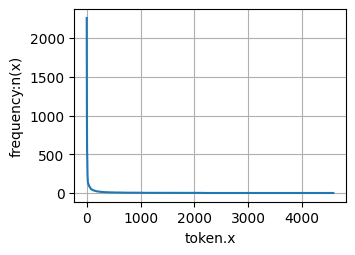

In [11]:
freqs = [freq for token,freq in vocab.token_freqs]
import dltools as d2l
d2l.plot(freqs,xlabel='token.x',ylabel='frequency:n(x)')

In [12]:
bigram_tokens = [pair for pair in zip(corpus[:-1],corpus[1:])]
bigram_tokens


[('the', 'time'),
 ('time', 'machine'),
 ('machine', 'by'),
 ('by', 'h'),
 ('h', 'g'),
 ('g', 'wells'),
 ('wells', 'i'),
 ('i', 'the'),
 ('the', 'time'),
 ('time', 'traveller'),
 ('traveller', 'for'),
 ('for', 'so'),
 ('so', 'it'),
 ('it', 'will'),
 ('will', 'be'),
 ('be', 'convenient'),
 ('convenient', 'to'),
 ('to', 'speak'),
 ('speak', 'of'),
 ('of', 'him'),
 ('him', 'was'),
 ('was', 'expounding'),
 ('expounding', 'a'),
 ('a', 'recondite'),
 ('recondite', 'matter'),
 ('matter', 'to'),
 ('to', 'us'),
 ('us', 'his'),
 ('his', 'grey'),
 ('grey', 'eyes'),
 ('eyes', 'shone'),
 ('shone', 'and'),
 ('and', 'twinkled'),
 ('twinkled', 'and'),
 ('and', 'his'),
 ('his', 'usually'),
 ('usually', 'pale'),
 ('pale', 'face'),
 ('face', 'was'),
 ('was', 'flushed'),
 ('flushed', 'and'),
 ('and', 'animated'),
 ('animated', 'the'),
 ('the', 'fire'),
 ('fire', 'burned'),
 ('burned', 'brightly'),
 ('brightly', 'and'),
 ('and', 'the'),
 ('the', 'soft'),
 ('soft', 'radiance'),
 ('radiance', 'of'),
 ('of', 

In [13]:
bigram_vocab = Vocab(bigram_tokens)
bigram_vocab.token_freqs

[(('of', 'the'), 309),
 (('in', 'the'), 169),
 (('i', 'had'), 130),
 (('i', 'was'), 112),
 (('and', 'the'), 109),
 (('the', 'time'), 102),
 (('it', 'was'), 99),
 (('to', 'the'), 85),
 (('as', 'i'), 78),
 (('of', 'a'), 73),
 (('i', 'saw'), 68),
 (('i', 'could'), 67),
 (('and', 'i'), 62),
 (('in', 'a'), 61),
 (('that', 'i'), 61),
 (('time', 'traveller'), 60),
 (('for', 'the'), 51),
 (('to', 'me'), 51),
 (('into', 'the'), 49),
 (('at', 'the'), 49),
 (('from', 'the'), 47),
 (('of', 'my'), 47),
 (('upon', 'the'), 46),
 (('for', 'a'), 45),
 (('on', 'the'), 45),
 (('i', 'felt'), 45),
 (('that', 'the'), 44),
 (('was', 'a'), 44),
 (('with', 'a'), 41),
 (('said', 'the'), 40),
 (('in', 'my'), 40),
 (('time', 'machine'), 39),
 (('was', 'the'), 39),
 (('then', 'i'), 39),
 (('the', 'morlocks'), 39),
 (('seemed', 'to'), 37),
 (('to', 'be'), 36),
 (('had', 'been'), 36),
 (('the', 'same'), 36),
 (('there', 'was'), 34),
 (('out', 'of'), 34),
 (('and', 'then'), 34),
 (('by', 'the'), 32),
 (('but', 'i'), 

In [14]:
trigra_tokens = [triple for triple in zip(corpus[:-2],corpus[1:-1],corpus[2:])]
trigra_vocab = Vocab(trigra_tokens)
trigra_vocab.token_freqs

[(('the', 'time', 'traveller'), 59),
 (('the', 'time', 'machine'), 30),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('it', 'was', 'a'), 15),
 (('here', 'and', 'there'), 15),
 (('seemed', 'to', 'me'), 14),
 (('i', 'did', 'not'), 14),
 (('i', 'saw', 'the'), 13),
 (('i', 'began', 'to'), 13),
 (('for', 'a', 'moment'), 12),
 (('said', 'the', 'time'), 12),
 (('out', 'of', 'the'), 12),
 (('i', 'could', 'see'), 12),
 (('a', 'kind', 'of'), 11),
 (('said', 'the', 'medical'), 11),
 (('one', 'of', 'the'), 11),
 (('i', 'saw', 'a'), 11),
 (('and', 'i', 'was'), 11),
 (('i', 'could', 'not'), 11),
 (('the', 'little', 'people'), 11),
 (('i', 'had', 'a'), 10),
 (('to', 'me', 'that'), 10),
 (('i', 'don', 't'), 10),
 (('the', 'white', 'sphinx'), 10),
 (('that', 'i', 'was'), 10),
 (('i', 'thought', 'of'), 9),
 (('i', 'did', 'so'), 9),
 (('that', 'i', 'had'), 9),
 (('i', 'had', 'seen'), 9),
 (('in', 'the', 'end'), 9),
 (('must', 'have', 'been'), 9),
 (('of', 'the', 'morlocks'), 9),
 ((

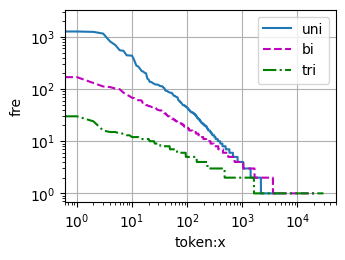

In [15]:
bigram_freqs = [freq for token,freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token,freq in trigra_vocab.token_freqs]

d2l.plot([freqs,bigram_freqs,trigram_freqs],xlabel='token:x',ylabel='fre',xscale='log',yscale='log',legend=['uni','bi','tri'])

In [16]:
import random

import torch


def seq_data_iter_random(corpus,batch_size,num_steps):
    corpus = corpus[random.randint(0,num_steps-1):]
    num_subseqs = (len(corpus)-1)//num_steps
    initial_indices = list(range(0,num_subseqs*num_steps,num_steps))

    random.shuffle(initial_indices)
    def data(pos):
        return corpus[pos:pos + num_steps]
    num_batches =num_subseqs//batch_size
    for i in range(0,batch_size*num_batches,batch_size):
        initial_indices_per_batch = initial_indices[i:i+batch_size]
        X =[data(j) for j in  initial_indices_per_batch]
        y = [data(j+1) for j in  initial_indices_per_batch]
        yield torch.tensor(X),torch.tensor(y)



In [17]:
myseq = list(range(35))
for X,y in seq_data_iter_random(myseq,batch_size=2,num_steps=5):
    print(X)
    print(y)

tensor([[ 6,  7,  8,  9, 10],
        [16, 17, 18, 19, 20]])
tensor([[ 7,  8,  9, 10, 11],
        [17, 18, 19, 20, 21]])
tensor([[ 1,  2,  3,  4,  5],
        [26, 27, 28, 29, 30]])
tensor([[ 2,  3,  4,  5,  6],
        [27, 28, 29, 30, 31]])
tensor([[21, 22, 23, 24, 25],
        [11, 12, 13, 14, 15]])
tensor([[22, 23, 24, 25, 26],
        [12, 13, 14, 15, 16]])


In [18]:
def seq_data_iter_order(corpus,batch_size,num_steps):
    offset = random.randint(0,num_steps)
    num_tokens = ((len(corpus)-offset-1)//batch_size) * batch_size
    Xs = torch.tensor(corpus[offset:offset+ num_tokens])
    ys = torch.tensor(corpus[1+offset:offset+ num_tokens+1])
    Xs,ys = Xs.reshape(batch_size,-1),ys.reshape(batch_size,-1)
    num_batches = Xs.shape[1]//num_steps
    for i in range(0,num_steps*num_batches,num_steps):
        X=Xs[:,i:i+num_steps]
        Y = ys[:,i:i+num_steps]
        yield X,Y


In [ ]:
for X,y in seq_data_iter_order(myseq,batch_size=2,num_steps=5):
    print(X)
    print(y)

tensor([[ 0,  1,  2,  3,  4],
        [17, 18, 19, 20, 21]]) 1111
tensor([[ 1,  2,  3,  4,  5],
        [18, 19, 20, 21, 22]])
tensor([[ 5,  6,  7,  8,  9],
        [22, 23, 24, 25, 26]]) 1111
tensor([[ 6,  7,  8,  9, 10],
        [23, 24, 25, 26, 27]])
tensor([[10, 11, 12, 13, 14],
        [27, 28, 29, 30, 31]]) 1111
tensor([[11, 12, 13, 14, 15],
        [28, 29, 30, 31, 32]])


In [20]:
class SeqDataLoader():
    def __init__(self,batch_size,num_steps,use_random_iter,max_token):
        if use_random_iter:
            self.data_iter_fn = seq_data_iter_random
        else:
            self.data_iter_fn = seq_data_iter_order

        self.corpus,self.vocab = load_corpus_time_machine(max_token)
        self.batch_size,self.num_steps = batch_size,num_steps

    def __iter__(self):
        return self.data_iter_fn(self.corpus,self.batch_size,self.num_steps)
    
    

In [21]:
def load_data_time_machine(batch_size,num_steps,use_random_iter=False,max_tokens=10000):
    dara_iter = SeqDataLoader(batch_size,num_steps,use_random_iter,max_tokens)
    return dara_iter,dara_iter.vocab

In [22]:
batch_size,num_steps =2,10
loader,vocab = load_data_time_machine(batch_size,num_steps)
for i in loader:
    print(i)
    break

(tensor([[ 4, 15,  9,  5,  6,  2,  1, 21, 19,  1],
        [ 1, 17,  4,  8,  1,  4, 12,  7,  6, 18]]), tensor([[15,  9,  5,  6,  2,  1, 21, 19,  1,  9],
        [17,  4,  8,  1,  4, 12,  7,  6, 18,  3]]))
